In [24]:
from google.colab import drive
import os

drive.mount('/content/drive')

os.chdir("/content/drive/MyDrive/Sprint")

os.makedirs('outputs', exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
df = pd.read_csv('Viral_Social_Media_Trends.csv')

In [ ]:
# Preprocessing
# Encode Platform and Content_Type
df_encoded = pd.get_dummies(df, columns=['Platform', 'Content_Type'], drop_first=True)

# Create Engagement Label (High = 1 if likes above median, else Low = 0)
df_encoded['Engagement_Label'] = (df_encoded['Likes'] > df_encoded['Likes'].median()).astype(int)

# Features for Regression
features_reg = ['Views', 'Shares', 'Comments'] + [col for col in df_encoded.columns if col.startswith('Platform_') or col.startswith('Content_Type_')]
X_reg = df_encoded[features_reg]
y_reg = df_encoded['Likes']

# Features for Classification
features_clf = ['Views', 'Likes', 'Shares', 'Comments']
X_clf = df_encoded[features_clf]
y_clf = df_encoded['Engagement_Label']

In [ ]:
# Multiple Linear Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = regressor.predict(X_test_reg)
reg_mse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"Regression Model Mean Squared Error: {reg_mse:.2f}")

Regression Model Mean Squared Error: 20815236227.62


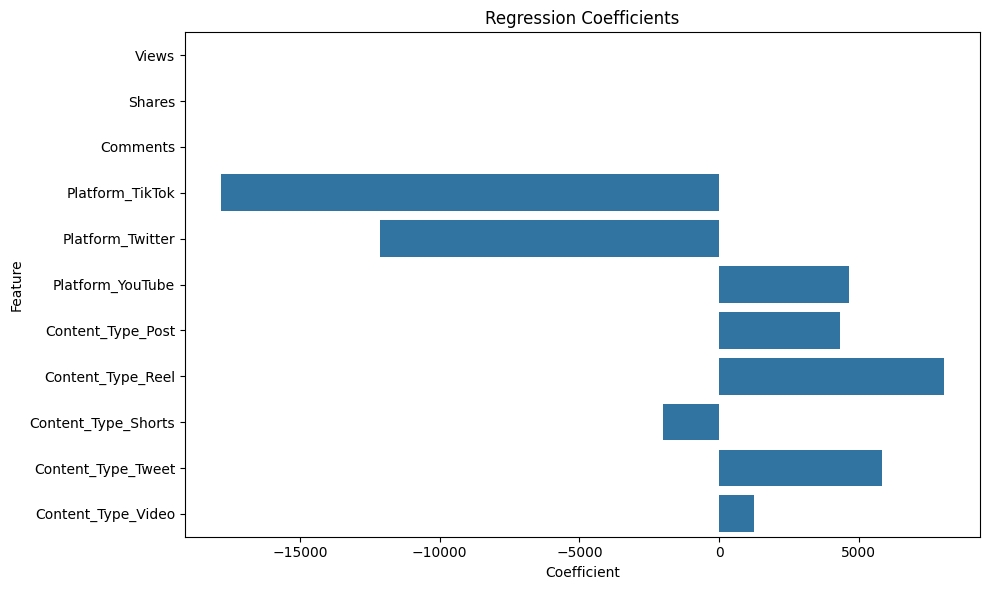

In [34]:
# Plot Regression Coefficients
coef_df = pd.DataFrame({'Feature': X_reg.columns, 'Coefficient': regressor.coef_})
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Regression Coefficients')
plt.tight_layout()
plt.show()
plt.savefig('outputs/regression_coefficients.png')
plt.close()

In [31]:
# Decision Tree Classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
tree_clf.fit(X_train_clf, y_train_clf)

y_pred_clf = tree_clf.predict(X_test_clf)
tree_acc = accuracy_score(y_test_clf, y_pred_clf)

print(f"Decision Tree Model Accuracy: {tree_acc:.2f}")

Decision Tree Model Accuracy: 1.00


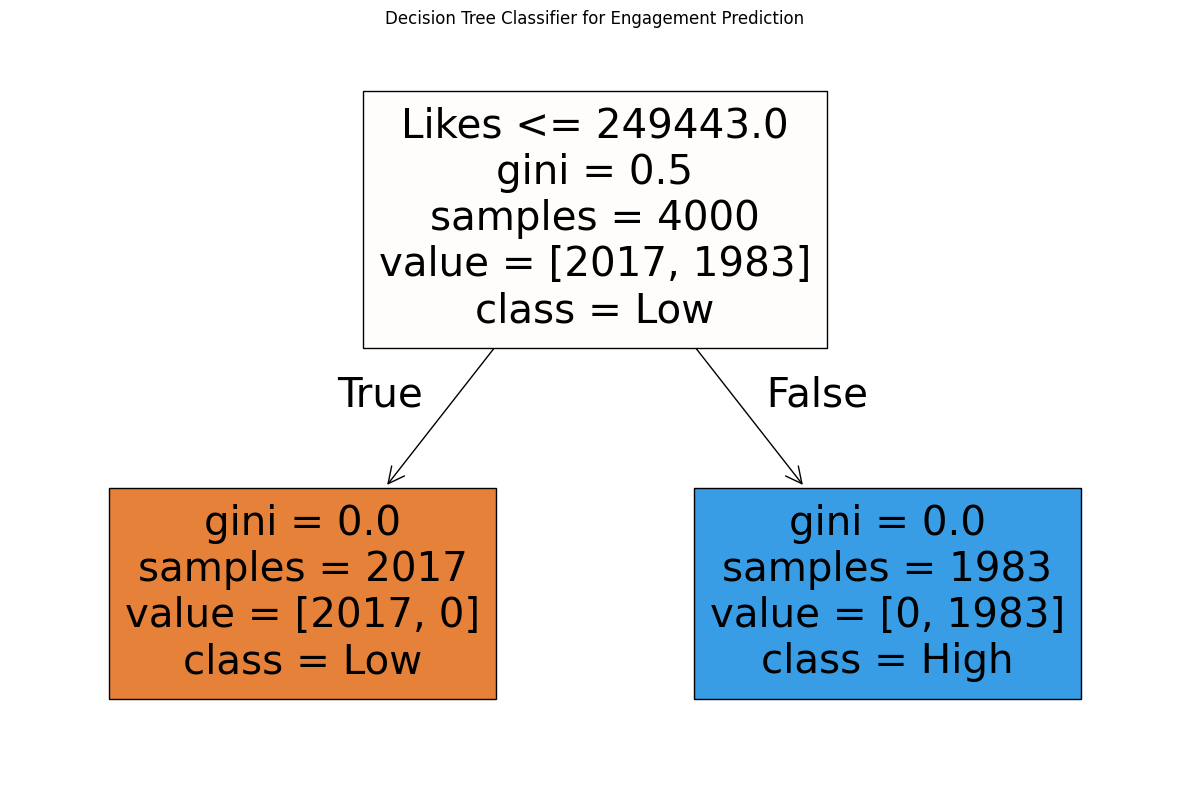

In [33]:
# Plot Decision Tree
plt.figure(figsize=(12,8))
plot_tree(tree_clf, feature_names=features_clf, class_names=['Low', 'High'], filled=True)
plt.title('Decision Tree Classifier for Engagement Prediction')
plt.tight_layout()
plt.show()
plt.savefig('outputs/decision_tree_plot.png')
plt.close()

In [32]:
# Save Cleaned Data and Model Summaries
df_encoded.to_csv('outputs/cleaned_data.csv', index=False)

with open('outputs/model_summaries.txt', 'w') as f:
    f.write(f"Regression Model MSE: {reg_mse:.2f}\n")
    f.write(f"Decision Tree Model Accuracy: {tree_acc:.2f}\n")
    f.write("\nTop Regression Coefficients:\n")
    f.write(coef_df.sort_values(by='Coefficient', ascending=False).to_string())